<a href="https://colab.research.google.com/github/kurtlee1984/Computer_vision_project/blob/main/train_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# # download Defect dataset
# !gdown --id '1o_10Y9HP0mxNV0-mZPy3zMCuWVLihrnb' -O dataset.zip

# download Blood Cell dataset
!gdown --id '1ETvE7jLhuJrSD21Es4TJKFrs1AXPDYsY' -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1ETvE7jLhuJrSD21Es4TJKFrs1AXPDYsY
To: /content/dataset.zip
14.7MB [00:00, 55.7MB/s]


In [4]:
# unzip dataset
!unzip -q dataset.zip

In [5]:
import sys
FOLDER_PATH = '/content/drive/MyDrive/yolo-v4-tf.keras' # Your YOLO folder path in google drive
sys.path.append(FOLDER_PATH)

In [6]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
import os

In [7]:
train_lines, val_lines = read_annotation_lines('./dataset/train_txt/anno.txt', test_size=0.1)
IMG_FOLDER_PATH = './'
class_name_path = os.path.join(FOLDER_PATH, 'class_names/bccd_classes.txt') # bccd_classes or aoi_classes
data_gen_train = DataGenerator(train_lines, class_name_path, IMG_FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, IMG_FOLDER_PATH)

model = Yolov4(weight_path=None, 
               class_name_path=class_name_path)

model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=100, 
          val_data_gen=data_gen_val)

nms iou: 0.413 score: 0.3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
41/41 [==============================] - 56s 491ms/step - loss: 19176.1543 - val_loss: 23279.0273
Epoch 2/100
41/41 [==============================] - 15s 359ms/step - loss: 1767.9236 - val_loss: 4859.0405
Epoch 3/100
41/41 [==============================] - 15s 359ms/step - loss: 1494.4425 - val_loss: 2639.2202
Epoch 4/100
41/41 [==============================] - 15s 361ms/step - loss: 1274.3792 - val_loss: 3092.4541
Epoch 5/100
41/41 [==============================] - 15s 359ms/step - loss: 1034.9783 - val_loss: 5178.8208
Epoch 6/100
41/41 [==============================] - 15s 360ms/step - loss: 874.6586 - val_loss: 2752.9648
Epoch 7/100
41/41 [==============================] - 15s 358ms/step - loss: 779.1591 - val_loss: 2722.2952
Epoch 8/100
41/41 [==============================] - 15s 360ms/step - loss: 697.8820 - val_loss: 2109.1108
Epoch 9/100
41/41 [==============================] - 15s 360ms/step - loss: 632.0355 - val_loss: 2262.9375
Epoch 10/100
41/41 [==========

# Save model

In [10]:
# model.yolo_model.save('/content/drive/MyDrive/yolov4.h5')
model.yolo_model.save('/content/model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [11]:
# model.yolo_model.save_weights('/content/drive/MyDrive/yolov4_weights.h5')
model.yolo_model.save_weights('/content/yolov4_weights.h5')

In [16]:
#  導入 inference 所需要的套件與函式庫

import cv2
import numpy as np
import os
from models import Yolov4
from glob import glob

In [ ]:
# Download pretrained weights from Google Drive

# Defect
# !gdown --id 1IIjLWlYAU-aQGK0yEzR88ajK4Ei254gp -O model.h5
# Blood Cell
!gdown --id 19aKs7h-BKwlyu8QiwbZ8ujlnWQPIKQWS -O model.h5

In [12]:
# build yolo model
model = Yolov4(class_name_path = os.path.join(FOLDER_PATH, 'class_names', 'bccd_classes.txt'))  # bccd_classes or aoi_classes 

model.load_model('model.h5')

nms iou: 0.413 score: 0.3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


nms iou: 0.413 score: 0.3


In [18]:
img_paths = glob('dataset/train_img/*.jpg')
len(img_paths)

364

img shape:  (480, 640, 3)
# of bboxes: 10


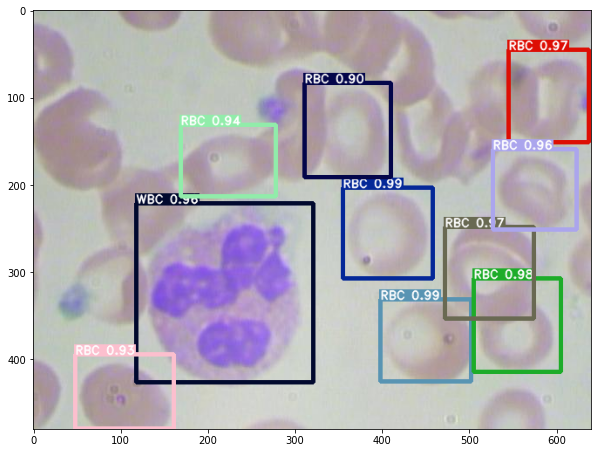

,x1,y1,x2,y2,class_name,score,w,h
0,355,203,458,307,RBC,0.993250,103,104
1,398,331,502,425,RBC,0.988528,104,94
2,505,307,605,414,RBC,0.980052,100,107
3,545,45,637,151,RBC,0.973009,92,106
4,472,248,574,353,RBC,0.971288,102,105
5,118,221,321,426,WBC,0.963368,203,205
6,527,159,623,251,RBC,0.960214,96,92
7,169,131,278,213,RBC,0.937141,109,82
8,48,394,161,479,RBC,0.927957,113,85
9,311,83,410,191,RBC,0.903257,99,108


In [19]:
# sample and predict
path = np.random.choice(img_paths, 1)[0]
model.predict(path)

In [ ]:
# download yolo v4 weights from GoogleDrive
!gdown --id 1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

In [ ]:
# build yolo model
model = Yolov4(class_name_path = os.path.join(FOLDER_PATH, 'class_names', 'coco_classes.txt'),
               weight_path='yolov4.weights')

In [ ]:
model.predict(os.path.join(FOLDER_PATH, 'img', 'test3.jpg'), random_color=True)